### ANN With Cutomer Churn Prediction- Classification

In [2]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [3]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
x = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [5]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# dataset.isnull().sum()
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [8]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [9]:
#Create dummy variables as the model cannot understand the strinngs
# geography=pd.get_dummies(X["Geography"],drop_first=True)
geography = pd.get_dummies(X['Geography'], drop_first = True)
gender = pd.get_dummies(X['Gender'], drop_first = True)
# gender=pd.get_dummies(X['Gender'],drop_first=True)


In [10]:
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [11]:
## Concatenate the Data Frames of the above 
X = pd.concat([X, geography, gender], axis=1)
# as the above features aded we are going to delete the cat variables
X =X.drop(['Geography', 'Gender'], axis=1)



In [12]:
#check the shape of the feature set
X.shape

(10000, 11)

In [13]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [14]:
# Splitting the dataset into the Training set and Test set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# in here the train set is 80% and the test set is 20%

In [15]:
# Feature Scaling we are doing this inorder to reduce the computation power of the gradient dcent as the values 
# get small the curve is small in size and etc mean =0 and std dev 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train) # doing transform as the values are changing
X_test = scaler.transform(X_test)
#scaler model is created and the fit transform is done to train data set and the for x test data set we are not going
# to do fit angain with taking test data as new set and change accordingly
# reduce overfitting and data leakage- giving question paper before exam

In [16]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [17]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

# tensorflow

In [18]:
import tensorflow
print(tensorflow.__version__)

2.2.0


In [19]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [20]:
#initialising the ANN as sequential makes the model forward and backward propagation
classifier = Sequential()

# the input layer of and the first hidden layer 
# whenever use relu best weight initializer is he uniform, input_dim is 11 because the no of features is 11
classifier.add(Dense(units=10, kernel_initializer='he_uniform', activation='relu', input_dim=11))

# the second hidden layer
classifier.add(Dense(units=10, kernel_initializer='he_uniform', activation='relu'))

#the output layer as this is a binary final neuron is 1 and as the activation sigmoid means becausse of the classificartion
classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))

#optimizer and compiling the model adam as its the best binary crossentropy as the classificatioon model
classifier.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
classifier.summary()
# how many weights and biases

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


In [22]:
X_train.shape

(8000, 11)

In [23]:
# fitting the ANN to the training set
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=100,epochs=100)

Epoch 1/100
54/54 [==============================] - 2s 30ms/step - loss: 0.7193 - accuracy: 0.5773 - val_loss: 0.5929 - val_accuracy: 0.6891
Epoch 2/100
54/54 [==============================] - 1s 25ms/step - loss: 0.5316 - accuracy: 0.7445 - val_loss: 0.5076 - val_accuracy: 0.7630
Epoch 3/100
54/54 [==============================] - 2s 36ms/step - loss: 0.4872 - accuracy: 0.7854 - val_loss: 0.4839 - val_accuracy: 0.7846
Epoch 4/100
54/54 [==============================] - 2s 28ms/step - loss: 0.4717 - accuracy: 0.7953 - val_loss: 0.4724 - val_accuracy: 0.7876
Epoch 5/100
54/54 [==============================] - 1s 25ms/step - loss: 0.4619 - accuracy: 0.7992 - val_loss: 0.4638 - val_accuracy: 0.7891
Epoch 6/100
54/54 [==============================] - 1s 27ms/step - loss: 0.4541 - accuracy: 0.8026 - val_loss: 0.4573 - val_accuracy: 0.7899
Epoch 7/100
54/54 [==============================] - 1s 19ms/step - loss: 0.4477 - accuracy: 0.8080 - val_loss: 0.4513 - val_accuracy: 0.7963
Epoch 

54/54 [==============================] - 1s 14ms/step - loss: 0.3349 - accuracy: 0.8627 - val_loss: 0.3644 - val_accuracy: 0.8478
Epoch 59/100
54/54 [==============================] - 0s 9ms/step - loss: 0.3342 - accuracy: 0.8621 - val_loss: 0.3645 - val_accuracy: 0.8470
Epoch 60/100
54/54 [==============================] - 0s 7ms/step - loss: 0.3341 - accuracy: 0.8636 - val_loss: 0.3644 - val_accuracy: 0.8482
Epoch 61/100
54/54 [==============================] - 1s 10ms/step - loss: 0.3335 - accuracy: 0.8621 - val_loss: 0.3642 - val_accuracy: 0.8482
Epoch 62/100
54/54 [==============================] - 1s 10ms/step - loss: 0.3329 - accuracy: 0.8642 - val_loss: 0.3642 - val_accuracy: 0.8485
Epoch 63/100
54/54 [==============================] - 1s 13ms/step - loss: 0.3322 - accuracy: 0.8638 - val_loss: 0.3639 - val_accuracy: 0.8489
Epoch 64/100
54/54 [==============================] - 1s 12ms/step - loss: 0.3319 - accuracy: 0.8642 - val_loss: 0.3639 - val_accuracy: 0.8489
Epoch 65/100
5

In [24]:
# what u will get in the history of the model
# model_history.history.keys()
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


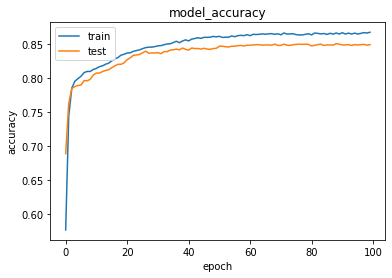

In [25]:
# using the histoy keys plot a diagram
print(model_history.history.keys())
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

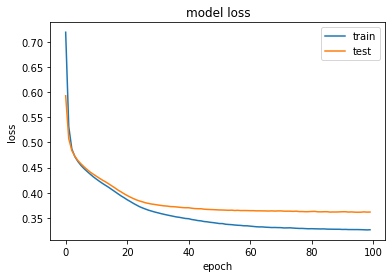

In [26]:
#geting the loss accuracy
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()


In [27]:
# making the predictions and evaluating the model

#predicting the test data set

y_pred = classifier.predict(X_test)
print(y_pred)
#making the condition to get the true or false according to the requirments of the domain
y_pred = (y_pred>0.5)
print(y_pred)

[[0.3293759 ]
 [0.3144428 ]
 [0.20055583]
 ...
 [0.13952193]
 [0.23084328]
 [0.16147786]]
[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


In [28]:
#making the confusion matrix 
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[1506,   89],
       [ 198,  207]])

In [29]:
# get the accuracy score

from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
score

0.8565